# ml-project-on-credit-card-scam

Here we are predicting how credit card scams are being done on what basis (which parameter) which is affecting the most.

In [1]:
!pip install numpy pandas matplotlib seaborn plotly --quiet
!pip install scipy opendatasets xgboost graphviz lightgbm scikit-learn xgboost lightgbm --upgrade --quiet

In [2]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
import plotly.express as px
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Downloading our data csv file and extracting.

CSV file is downloaded, now converting csv file to a dataframe.

This dataset is used for fraud detection and has a highly imbalanced class distribution, with the majority of transactions being non-fraudulent (Class 0) and a small percentage being fraudulent (Class 1).

Here's a breakdown of the dataset features:

Time: Represents the seconds elapsed between each transaction and the first transaction in the dataset.

Amount: Represents the transaction amount.

V1, V2, ..., V28: Numerical input variables that are the result of a Principal Component Analysis (PCA) transformation. These are likely features derived from the original dataset to reduce dimensionality.

Class: The response variable, taking a value of 1 in case of fraud and 0 otherwise.

In [3]:
file_path= 'D:/creditcard_2023.csv'
raw_df= pd.read_csv(file_path)

In [4]:
raw_df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,1.430971,-1.330500,-1.580730,-1.363454,0.287766,-1.480796,-1.520928,-1.376970,1.789103,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,0.173590,-0.539948,0.738315,-0.812043,0.870447,-0.545184,-0.575991,-0.664313,0.101604,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,0.477582,-0.461849,-0.606100,-0.395126,-0.040673,-0.370201,-0.729002,-0.251679,-0.343196,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,-0.324934,0.335215,0.464177,-0.390369,0.893881,0.477402,0.848443,0.930280,-0.481058,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


Successfully created a dataframe that contains 568630 rows × 31 columns.

In [5]:
raw_df['Class'] = raw_df['Class'].map({1: 'Yes', 0: 'No'})

class column which is the target column is in integer format so here it is converted as 1->Yes and 0->No

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

Now splitting the data into three parts : training set, validation set and test set.

In [7]:
train_df, val_df, test_df = \
              np.split(raw_df.sample(frac=1, random_state=5), 
                       [int(.7*len(raw_df)), int(.85*len(raw_df))])

#0r we can split it by another form given below

from sklearn.model_selection import train_test_split
train_df, test_val_df = train_test_split(raw_df, random_state=30, train_size =0.70)
test_df, val_df = train_test_split(test_val_df, random_state=30, train_size=0.50)

Here, inputs columns are from V1 to V28 and Amount and target column is Class.

In [8]:
input_cols = list(train_df.columns)[1:-1]
target_cols ="Class" 

Creating training, validation and test sets of both input and target columns

In [9]:
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_cols].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_cols].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_cols].copy()

Getting the statistical information of training input(input columns)

In [10]:
test_inputs[input_cols].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000,85294.000000
mean,-0.002932,0.003163,-0.002799,0.003174,-0.004056,0.001243,-0.002989,0.001757,0.000109,-0.004827,0.001037,-0.005342,0.000771,-0.001209,-0.000405,-0.005096,-0.002858,-0.002515,0.001262,0.002650,-0.003379,0.006213,0.004099,0.003234,-0.002909,-0.001920,-0.003796,-0.004943,12013.242004
std,1.002409,0.996715,1.003311,1.000723,1.018882,1.003740,0.965640,1.003041,1.003664,0.998187,1.001336,0.999518,1.000861,0.997740,1.004980,0.996190,1.002310,1.000324,1.000039,0.980566,0.996441,0.999865,0.968989,0.995753,0.996992,1.008304,1.001185,0.969746,6920.031445
min,-2.762898,-30.224879,-2.578182,-4.697037,-5.182978,-15.511961,-4.350806,-6.595785,-3.751187,-3.163148,-4.871031,-2.020232,-3.901028,-2.106755,-3.849000,-2.211340,-2.483344,-2.416392,-4.592047,-26.886679,-12.165154,-6.450353,-21.504910,-4.011627,-10.230967,-6.230336,-10.498633,-29.510941,50.340000
25%,-0.570955,-0.488385,-0.651703,-0.653631,-0.297054,-0.447387,-0.291598,-0.192954,-0.569426,-0.594602,-0.699154,-0.838070,-0.696054,-0.873656,-0.627829,-0.722702,-0.623077,-0.554975,-0.567730,-0.349266,-0.166650,-0.488848,-0.237613,-0.645222,-0.555507,-0.638761,-0.304627,-0.231306,6009.972500
50%,-0.099044,-0.136652,-0.001528,-0.073531,0.079402,0.081845,0.232072,-0.115131,0.095989,0.258289,-0.038939,0.153715,0.019287,0.226814,-0.039282,0.129058,0.271211,0.089265,-0.026645,-0.122077,-0.037032,-0.023089,-0.058718,0.019515,-0.008839,-0.009548,-0.172570,-0.014762,11971.925000
75%,0.828919,0.347453,0.626457,0.710882,0.435848,0.500695,0.525248,0.047057,0.562955,0.590487,0.753110,0.741320,0.683646,0.748701,0.666670,0.649810,0.520438,0.542863,0.563778,0.252323,0.148751,0.471514,0.160414,0.696167,0.544897,0.676749,0.335388,0.405044,17999.562500
max,2.162849,4.361098,14.125834,2.498661,33.317927,9.704313,41.568286,5.956513,20.270062,31.722709,2.512860,8.665597,3.997272,11.024817,5.928441,9.679455,6.949230,5.118662,3.575740,12.832211,8.087080,9.769257,22.694051,9.878090,8.088045,5.555557,26.944437,15.544512,24039.930000


In [11]:
train_inputs[input_cols].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000,398041.000000
mean,0.000533,-0.000541,-0.000119,-0.000376,0.001060,0.000086,0.000577,-0.001082,0.000196,0.001019,0.000472,0.000338,-0.000882,-0.000130,-0.000222,0.000485,0.000667,0.001323,-0.000457,-0.000503,0.001234,-0.001970,-0.000305,-0.000765,-0.000253,0.000446,0.000790,0.001858,12048.498303
std,0.999011,1.000931,0.999004,0.999006,0.997877,0.998594,0.957386,0.999171,0.999621,1.000714,0.999193,0.998979,0.999939,0.999741,0.999165,0.998014,0.999161,1.000290,0.999707,0.998965,1.001333,1.000326,1.006525,1.001094,1.000944,0.998680,0.986827,1.004719,6920.801988
min,-3.495584,-49.966572,-2.631176,-4.951222,-5.038171,-21.111108,-4.351839,-7.869677,-3.751900,-3.163276,-5.954723,-2.020399,-4.082234,-2.107417,-3.859408,-2.214513,-2.484938,-2.421949,-7.804988,-37.716673,-12.224367,-7.734798,-25.431127,-4.067968,-11.696787,-8.226969,-6.103140,-21.733407,50.010000
25%,-0.563507,-0.486408,-0.648822,-0.656511,-0.293082,-0.445267,-0.281893,-0.192230,-0.567782,-0.589370,-0.700187,-0.829541,-0.698374,-0.873726,-0.619754,-0.714706,-0.618503,-0.555607,-0.565091,-0.350487,-0.166368,-0.491381,-0.237364,-0.653462,-0.553903,-0.630871,-0.304822,-0.231924,6063.950000
50%,-0.092522,-0.135312,-0.000123,-0.073569,0.081168,0.078037,0.233512,-0.114427,0.090868,0.262664,-0.040389,0.162598,0.015886,0.230107,-0.039500,0.133831,0.271624,0.087373,-0.025516,-0.123427,-0.037272,-0.028355,-0.059570,0.014707,-0.008991,-0.012272,-0.172545,-0.013336,12040.260000
75%,0.832151,0.342821,0.627958,0.705742,0.440297,0.496632,0.526126,0.047057,0.558313,0.592999,0.746492,0.744799,0.685358,0.752456,0.663676,0.656112,0.518225,0.544461,0.559334,0.247583,0.147904,0.461538,0.155184,0.701459,0.550841,0.672442,0.334732,0.411064,18048.720000
max,2.225587,4.361865,4.615014,3.201536,42.716891,10.199833,53.501637,5.957691,12.171681,17.445327,2.513573,7.977355,4.657334,12.276659,8.814008,15.104540,5.720070,6.783716,3.818633,29.872812,8.087080,9.770893,31.707627,11.057645,14.621509,5.623285,30.339264,77.255937,24039.930000


Scaling the features in Scaler by using MinMaxScaler to scale values to the (0,1) range.

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler().fit(raw_df[input_cols])
train_inputs[input_cols]=scaler.transform(train_inputs[input_cols])
val_inputs[input_cols]=scaler.transform(val_inputs[input_cols])
test_inputs[input_cols]=scaler.transform(test_inputs[input_cols])

## DECISION TREE CLASSIFIER 

Now training a DecisionTree

In [13]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=5)
model.fit(train_inputs, train_targets)

DecisionTreeClassifier(random_state=5)

Evaluating the decision tree using accuracy score on both training and validation set.

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_preds = model.predict(train_inputs)
train_preds

array(['Yes', 'No', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

Count of predicted values

In [15]:
pd.value_counts(train_preds)

Yes    199149
No     198892
Name: count, dtype: int64

Let's check the accuracy of its prediction. 

In [16]:
accuracy_score(train_targets, train_preds)

1.0

Accuracy score for training set is 100 % here.

Evaluating same for the validation set now.

In [17]:
val_preds = model.predict(val_inputs)
val_preds

array(['Yes', 'Yes', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype=object)

In [18]:
accuracy_score(val_targets, val_preds)

0.9978427809367489

Accuracy score for validation set is approx 99.78 percent which is good if model is trained this well.

Now again evaluating the same for the test set.

In [19]:
test_preds = model.predict(test_inputs)
test_preds

array(['No', 'No', 'Yes', ..., 'Yes', 'No', 'Yes'], dtype=object)

In [20]:
accuracy_score(test_targets, test_preds)

0.9976903416418506

Accuracy score for test set is also approx 99 percent.

Getting the value count in percentage for training validation and test targets.

In [21]:
train_targets.value_counts()/len(train_targets)

Class
Yes    0.500323
No     0.499677
Name: count, dtype: float64

In training set both Yes and No are approximately 50% - 50%

In [22]:
val_targets.value_counts()/len(val_targets)

Class
No     0.502187
Yes    0.497813
Name: count, dtype: float64

In validation set also both Yes and No are approximately 50% - 50%

In [23]:
test_targets.value_counts()/len(test_targets)

Class
Yes    0.50068
No     0.49932
Name: count, dtype: float64

In test set also both Yes and No are approximately 50% - 50%

In [24]:
# defining a helper function for plotting confusion matrix of Training, Validation and Test set

def pred_and_plot(inputs, targets, name=''):
    preds=model.predict(inputs)
    accuracy=accuracy_score(targets, preds)
    print ('Accuracy:{:2f}%'.format(accuracy*100))
    cf=confusion_matrix(targets,preds,normalize="true")
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.title("{} Confusion Matrix".format(name));
    return preds

Accuracy:99.784278%


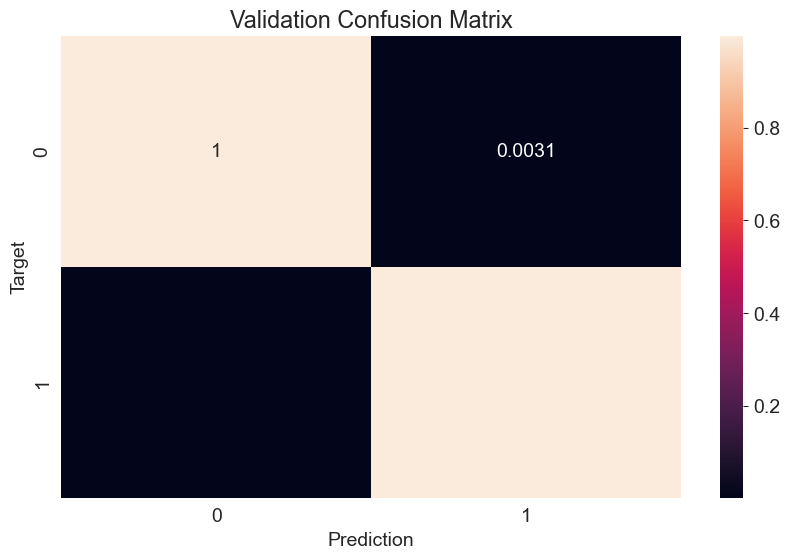

In [25]:
val_preds=pred_and_plot(val_inputs, val_targets, "Validation")

In Validation set the accuracy is 99.778413% the false negatives and false positives are so low.

Accuracy:100.000000%


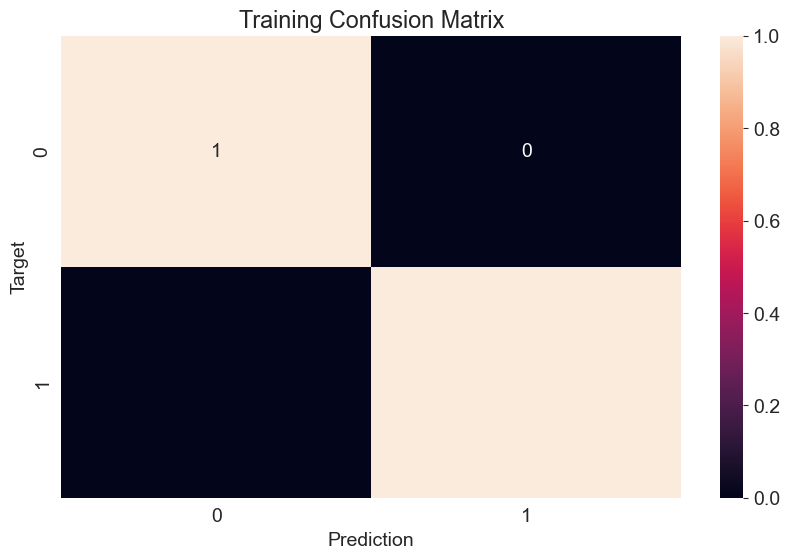

In [26]:
train_preds=pred_and_plot(train_inputs, train_targets, "Training")

In Training set the accuracy is 100% the false negatives and false positives are zero.

Accuracy:99.769034%


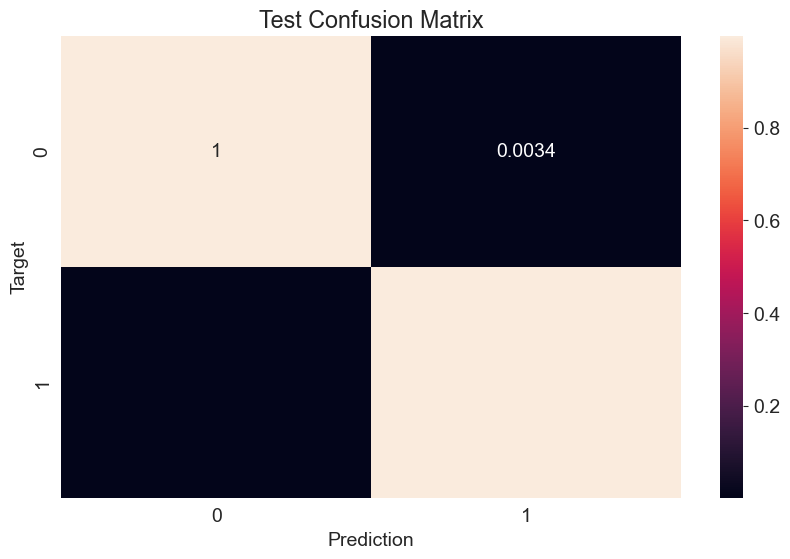

In [27]:
test_preds=pred_and_plot(test_inputs, test_targets, "Test")

In Validation set the accuracy is 99% approx the false negatives and false positives are so low

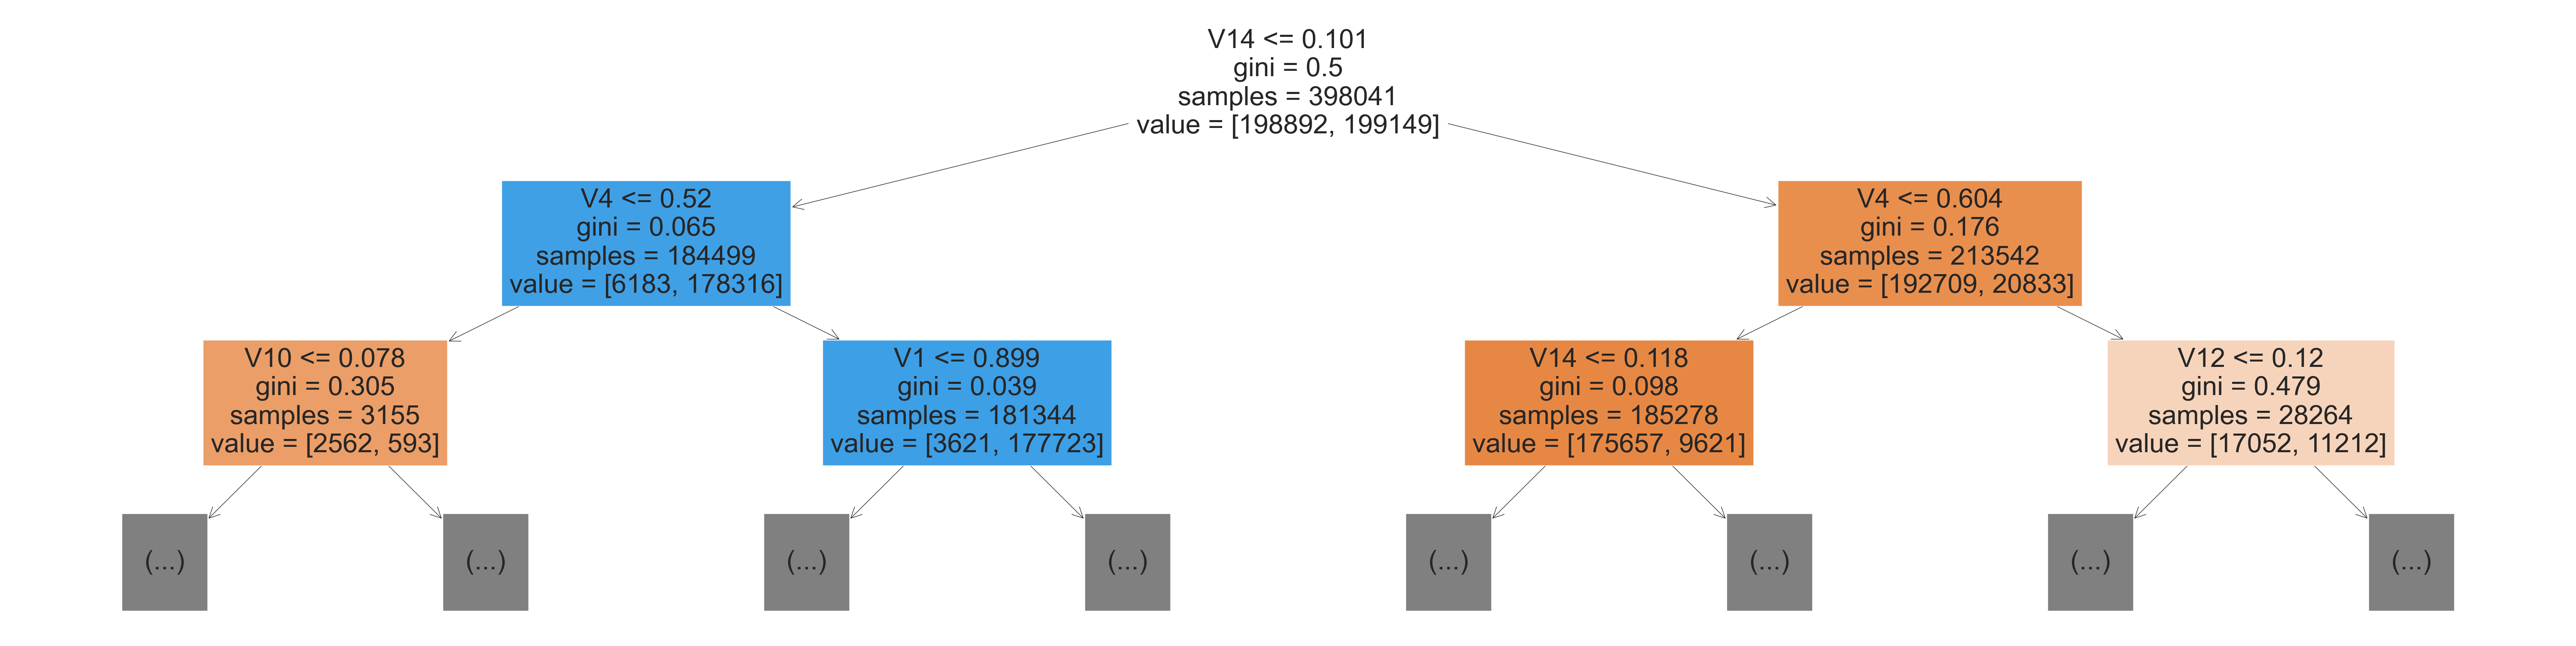

In [28]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=train_inputs.columns, max_depth= 2, filled=True);

Decision tree upto depth 2 has been plotted where we can see that the parameter that matters the most is V14.

In [29]:
# knowing the maximum depth of decision tree
model.tree_.max_depth

39

In [30]:
# drawing the decion tree in text form (horizontally)
tree_text=export_text(model, max_depth=10, feature_names= list(train_inputs.columns))
print (tree_text[:5000])

|--- V14 <= 0.10
|   |--- V4 <= 0.52
|   |   |--- V10 <= 0.08
|   |   |   |--- V25 <= 0.50
|   |   |   |   |--- class: Yes
|   |   |   |--- V25 >  0.50
|   |   |   |   |--- class: No
|   |   |--- V10 >  0.08
|   |   |   |--- V4 <= 0.50
|   |   |   |   |--- V7 <= 0.02
|   |   |   |   |   |--- V11 <= 0.71
|   |   |   |   |   |   |--- V14 <= 0.10
|   |   |   |   |   |   |   |--- V14 <= 0.10
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- V14 >  0.10
|   |   |   |   |   |   |   |   |--- V3 <= 0.21
|   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |--- V3 >  0.21
|   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |--- V14 >  0.10
|   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |--- V11 >  0.71
|   |   |   |   |   |   |--- V4 <= 0.48
|   |   |   |   |   |   |   |--- V7 <= 0.02
|   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |--- V7 >  0.02
|   |   |   |   |   |

Based on Gini Index computations, a decision tree assigns an "importance" to each feature. These values can be used to interpret the result given by a decision tree.

In [31]:
#calculating feature importance
model.feature_importances_

array([1.54881962e-02, 4.48958435e-03, 1.10643387e-02, 6.50330593e-02,
       5.46574626e-03, 3.14397554e-03, 7.45519534e-03, 1.01845086e-02,
       5.78968997e-03, 8.13496711e-03, 7.59117110e-03, 2.07052685e-02,
       1.00469728e-02, 7.70734684e-01, 6.87368419e-03, 8.60927698e-03,
       4.12541143e-03, 2.39579153e-03, 4.58362887e-03, 3.45389831e-03,
       2.74527427e-03, 1.94100831e-03, 4.26399053e-03, 1.61527281e-03,
       2.89812640e-03, 2.83618001e-03, 2.68002427e-03, 5.62193207e-03,
       2.91424938e-05])

Training input has 29 columns thats why it has 29 values shows the importance of each column.

Now, lets turn this into a dataframe and visualize the most important feature.

In [32]:
importance_df= pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending= False)

importance_df

,feature,importance
13,V14,0.770735
3,V4,0.065033
11,V12,0.020705
0,V1,0.015488
2,V3,0.011064
7,V8,0.010185
12,V13,0.010047
15,V16,0.008609
9,V10,0.008135
10,V11,0.007591


This is showing that V14 is the most important feature in all.

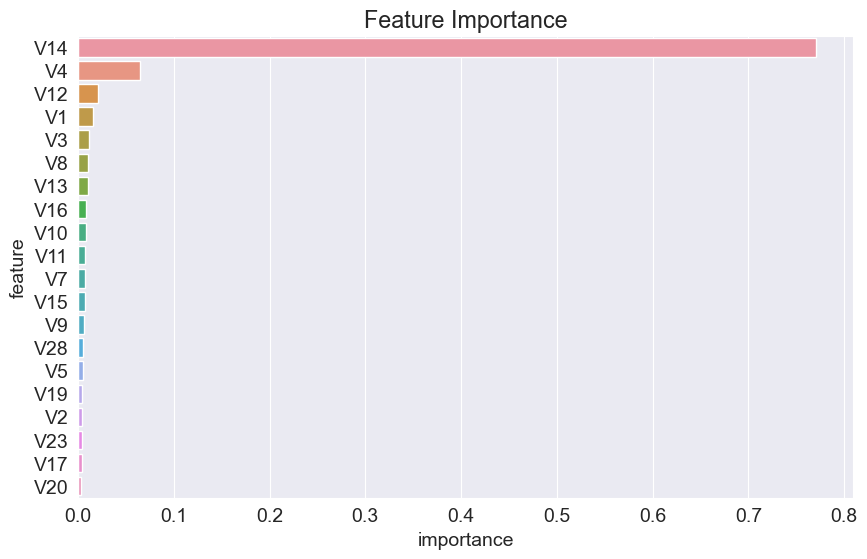

In [33]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(20), x= 'importance',y= 'feature');

Above barplot is showing the horizontal barplot of Feature Importance, showing v14 is the most important feature and then V4 then V12 and so on.

Now, as you can see that decision tree gives 99% and 100% accuracy in both validation and training set reacpectively. Lets use Random Forest Classifier for same dataset and see the results that will show. 

## RANDOM FOREST CLASSIFIER

We'll use the RandomForestClassifier class from sklearn.ensemble

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
model = RandomForestClassifier (n_jobs=-1, random_state=30)

n_jobs allows the random forest to use multiple parallel workers to train decision tree and random_state=30 ensures that we get the same result for each execution.

In [36]:
model.fit(train_inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=30)

In [37]:
model.score(train_inputs, train_targets)

1.0

Accuracy score for training set is 100%.

In [38]:
model.score(val_inputs, val_targets)

0.9999413799167595

Accuracy score for validation set is 99.99% approx.

In [39]:
model.score(test_inputs, test_targets)

0.9998593101507727

Accuracy score for test set is also 99.98% approx.

In [40]:
# creating a helper function to see the training error and validation error with different depths.

def max_depth_error(md):
    model= DecisionTreeClassifier (max_depth=md, random_state=30)
    model.fit (train_inputs, train_targets)
    train_error = 1- model.score(train_inputs, train_targets)
    val_error = 1- model.score(val_inputs, val_targets)
    return {'Max Depth':md, 'Training Error': train_error, 'Validation Error': val_error}

Creating a dataframe of above data that contains 3 columns Max_depth, training error and validation error having max_depth from 15 to 40.

In [41]:
errors_df= pd.DataFrame([max_depth_error(md) for md in range(15,40)])
errors_df

,Max Depth,Training Error,Validation Error
0,15,0.002517,0.003705
1,16,0.001668,0.003224
2,17,0.001377,0.003271
3,18,0.000920,0.002755
4,19,0.000663,0.002521
5,20,0.000530,0.002450
6,21,0.000430,0.002345
7,22,0.000314,0.002321
8,23,0.000281,0.002333
9,24,0.000261,0.002122


Lets plot a graph of above dataframe.

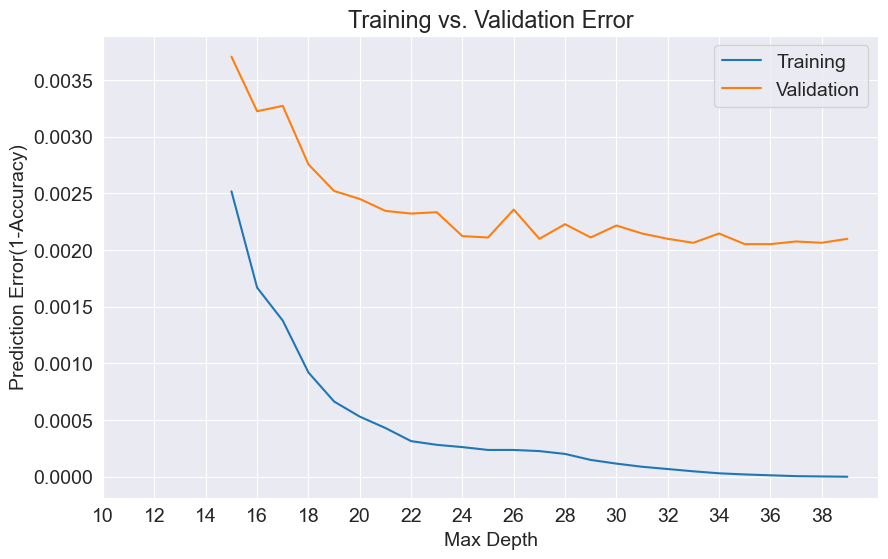

In [42]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks (range(10,40,2))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error(1-Accuracy)')
plt.legend(['Training', 'Validation']);

We can also see the probabilities for the predictions.

In [43]:
train_probs = model.predict_proba(train_inputs)
train_probs

array([[0.02, 0.98],
       [1.  , 0.  ],
       [0.  , 1.  ],
       ...,
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]])

We can also access individual decision tree using model.estimators_

In [44]:
model.estimators_[10]

DecisionTreeClassifier(max_features='sqrt', random_state=1488901265)

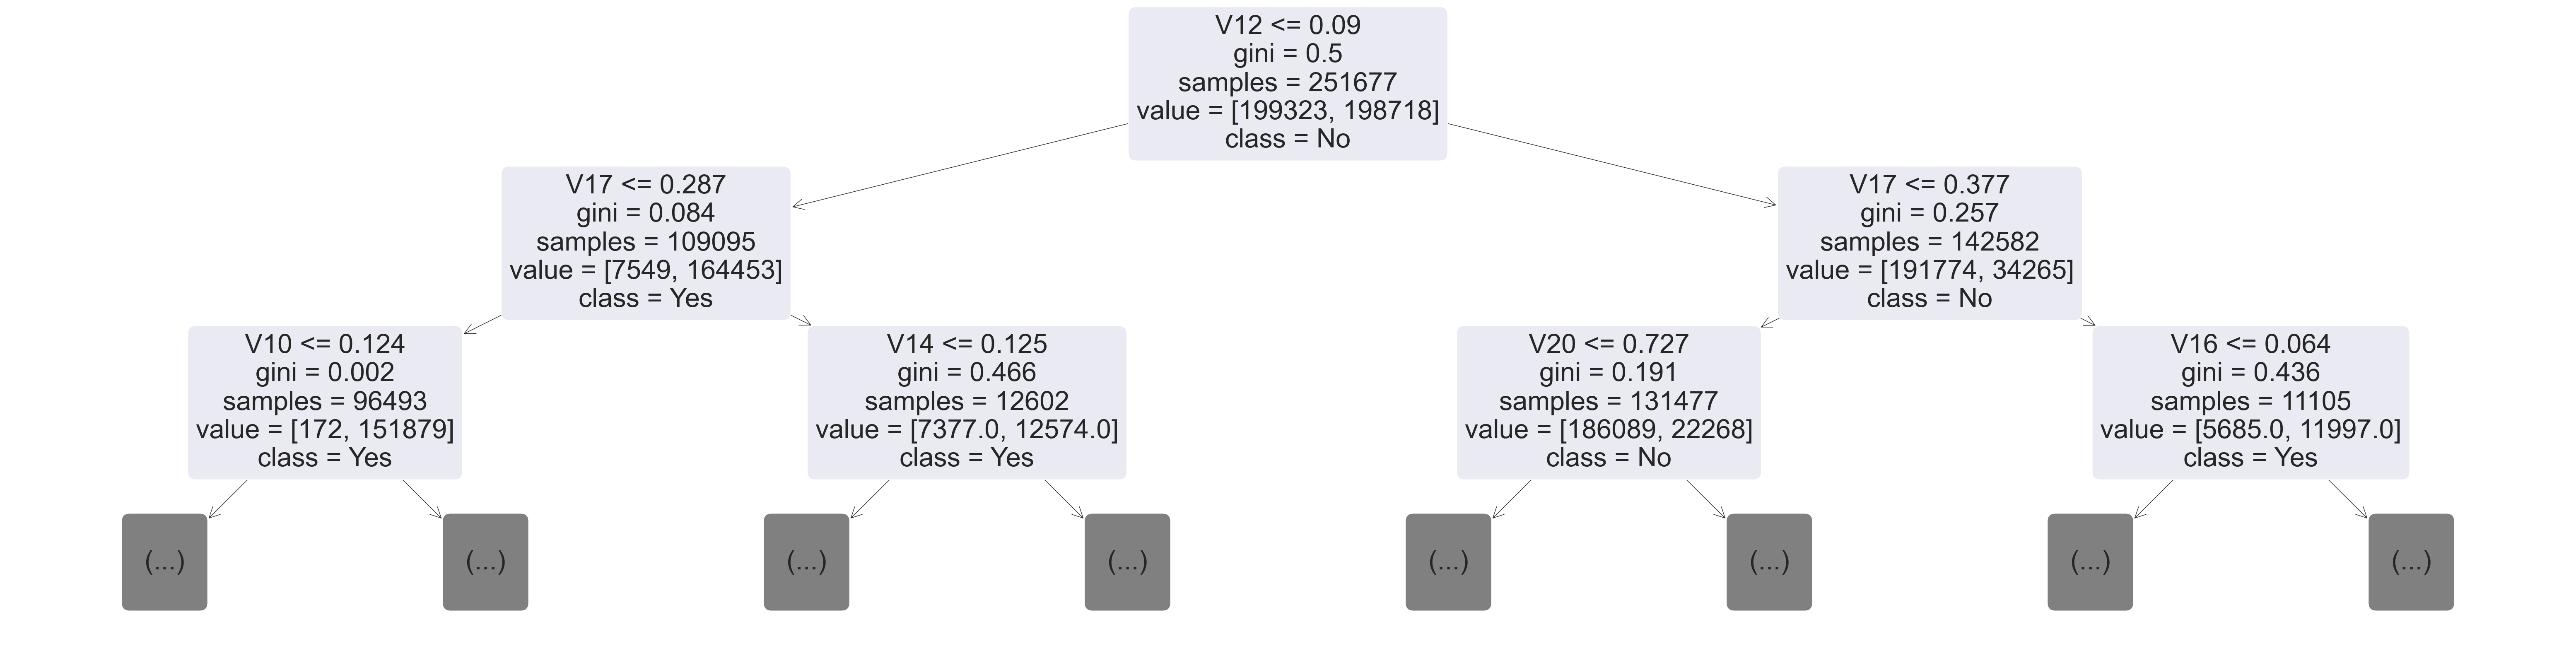

In [45]:
plt.figure (figsize= (80, 20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=train_inputs.columns, rounded= True, class_names=model.classes_);

Decision Tree no. 0 will get plotted with depth 2

In [46]:
#identify the total number of decision trees used
len(model.estimators_)

100

By default 100 Decision trees are used.

In [47]:
#creating dataframe for feature importance

importance_df= pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending= False)

importance_df.head(10)

,feature,importance
13,V14,0.236733
11,V12,0.145347
9,V10,0.108393
3,V4,0.100143
10,V11,0.067346
16,V17,0.065326
15,V16,0.039951
2,V3,0.036479
6,V7,0.027493
1,V2,0.022583


This is showing the top 10 feature imprtances that shows V14 is the most important feature in all.

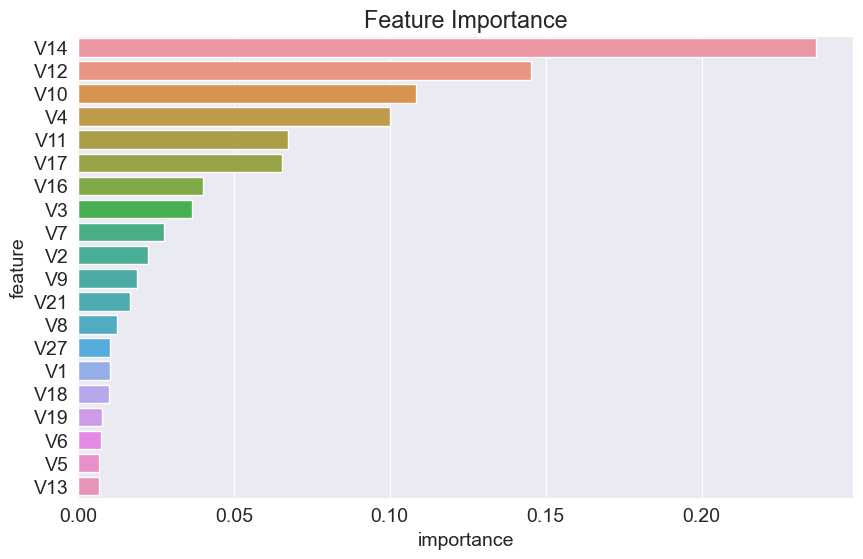

In [48]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(20), x= 'importance',y= 'feature');

Above barplot is showing the horizontal barplot of Feature Importance, showing v14 is the most important feature and then V12 then V10 and so on.

In [49]:
def max_depth_error(md):
    model= DecisionTreeClassifier (max_depth=md, random_state=30)
    model.fit (train_inputs, train_targets)
    train_error = 1- model.score(train_inputs, train_targets)
    val_error = 1- model.score(val_inputs, val_targets)
    return {'Max Depth':md, 'Training Error': train_error, 'Validation Error': val_error}

Creating a dataframe that contains 3 columns Max_depth, training error and validation error having max_depth from 1 to 21.

In [50]:
errors_df= pd.DataFrame([max_depth_error(md) for md in range(15,40)])
errors_df

,Max Depth,Training Error,Validation Error
0,15,0.002517,0.003705
1,16,0.001668,0.003224
2,17,0.001377,0.003271
3,18,0.000920,0.002755
4,19,0.000663,0.002521
5,20,0.000530,0.002450
6,21,0.000430,0.002345
7,22,0.000314,0.002321
8,23,0.000281,0.002333
9,24,0.000261,0.002122


Plotting a graph of above dataframe.

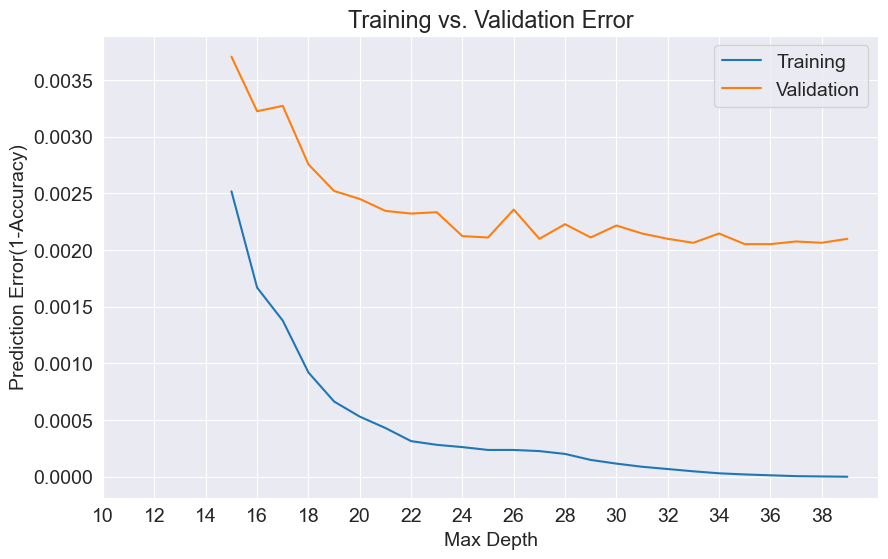

In [51]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks (range(10,40,2))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error(1-Accuracy)')
plt.legend(['Training', 'Validation']);

Our model is very well trained but still lets have a look at the hyperparameter tuning, how it is affecting our model.

### Hyperparameter Tuning with Random forest

Creating a base model with which we can compare models with tuned hyperparameters.

In [52]:
base_model= RandomForestClassifier (random_state=30, n_jobs= -1).fit(train_inputs, train_targets)
base_training_accuracy = base_model.score (train_inputs, train_targets)
base_validation_accuracy = base_model.score (val_inputs, val_targets)

base_accuracy = base_training_accuracy, base_validation_accuracy
base_accuracy

(1.0, 0.9999413799167595)

We can use the above values as a benchmark for hyperparameter tuning.

Creating a helper function test_params to test the hyperparameters.

In [53]:
#creating helper function test_params

def test_params (**params):
    model = RandomForestClassifier (random_state=30, n_jobs= -1, **params).fit(train_inputs, train_targets)
    return model.score (train_inputs, train_targets), model.score (val_inputs, val_targets)

Firstly, checking for different n_estimators (number of trees) values.

In [54]:
test_params (n_estimators=20)

(1.0, 0.9999179318834632)

In [55]:
test_params (n_estimators=56)

(1.0, 0.9999296559001114)

In [56]:
test_params (n_estimators=67)

(1.0, 0.9999296559001114)

In [57]:
test_params (n_estimators=94)

(1.0, 0.9999413799167595)

As we can see that even with lesser number of trees we got the good accuracy of our model.

Then, checking for different max_depth values.

In [58]:
test_params (max_depth=28)

(1.0, 0.9999296559001114)

In [59]:
test_params (max_depth=2**3)

(0.9738594767875671, 0.9741954393575238)

In [60]:
test_params (max_depth=64)

(1.0, 0.9999413799167595)

Here also, even with the lesser depth the accuracy is good enough. 

Now, checking for different max_features values.

In [61]:
test_params (max_features=9)

(1.0, 0.9999179318834632)

In [62]:
test_params (max_features='log2')

(1.0, 0.9999179318834632)

In [63]:
test_params (max_features='sqrt')

(1.0, 0.9999413799167595)

Now, checking for different min_samples_split (specifies the minimum number of samples or rows required to split an internal node) and min_samples_leaf (specifies the minimum number of samples or rows required to be at a leaf node) values.

In [64]:
test_params (min_samples_split=100, min_samples_leaf=20)

(0.999354337869717, 0.9990620786681517)

In [65]:
test_params (min_samples_split=10, min_samples_leaf=8)

(0.9998442371514492, 0.9998241397502784)

Checking for different min_impurity_decrease (specifies the minimum decrease in Gini Index) values

In [66]:
test_params (min_impurity_decrease=1e-5)

(0.999698523518934, 0.9995310393340758)

In [67]:
test_params (min_impurity_decrease=1e-7)

(0.9998894586236091, 0.9998944838501671)

In [68]:
test_params (min_impurity_decrease=1e-9)

(0.9999949753919822, 0.9999413799167595)

Checking for bootstrap, by default its true, if false, the whole dataset is used to build each tree.

In [69]:
test_params (bootstrap= False)

(1.0, 0.9999531039334076)

max_samples are used when bootstrap is true, the number of samples to draw from X to train each base estimator(int or float; default:None)

In [70]:
test_params (max_samples = 0.9)

(1.0, 0.9999296559001114)

In [71]:
train_targets.value_counts()/len(train_targets)

Class
Yes    0.500323
No     0.499677
Name: count, dtype: float64

class_weight is used to give more weightage to the particular class that has lower percentage.

In [72]:
test_params (class_weight = 'balanced')

(1.0, 0.9999296559001114)

Now training a model by random forest classifier with some different hyperparameters.

In [73]:
model= RandomForestClassifier (n_jobs=-1, random_state=30, n_estimators=10, max_features='sqrt', max_depth=22, class_weight = 'balanced_subsample')

In [74]:
model.fit (train_inputs, train_targets)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=22,
                       n_estimators=10, n_jobs=-1, random_state=30)

In [75]:
model.score(train_inputs, train_targets), model.score(val_inputs, val_targets)

(0.9999648277438756, 0.9998006917169823)

Here we can see the improved accuracy by tuning hyperparameters.

Finally, computing the accuracy of model on test set.

In [76]:
model.score(test_inputs, test_targets)

0.9998124135343635

The test set accuracy is good that is 99% approx, so our model is trained very well for the predictions.

### References 

- https://jovian.com/boascents2/machine-learning-course-project-final
- https://www.kaggle.com/code/xwxw2929/rossmann-sales-top1/notebook
- https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/code
- https://www.kaggle.com/code/ahmedraafat666/credit-card-fraud-detection-model
- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code